In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import missingno as msn

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64


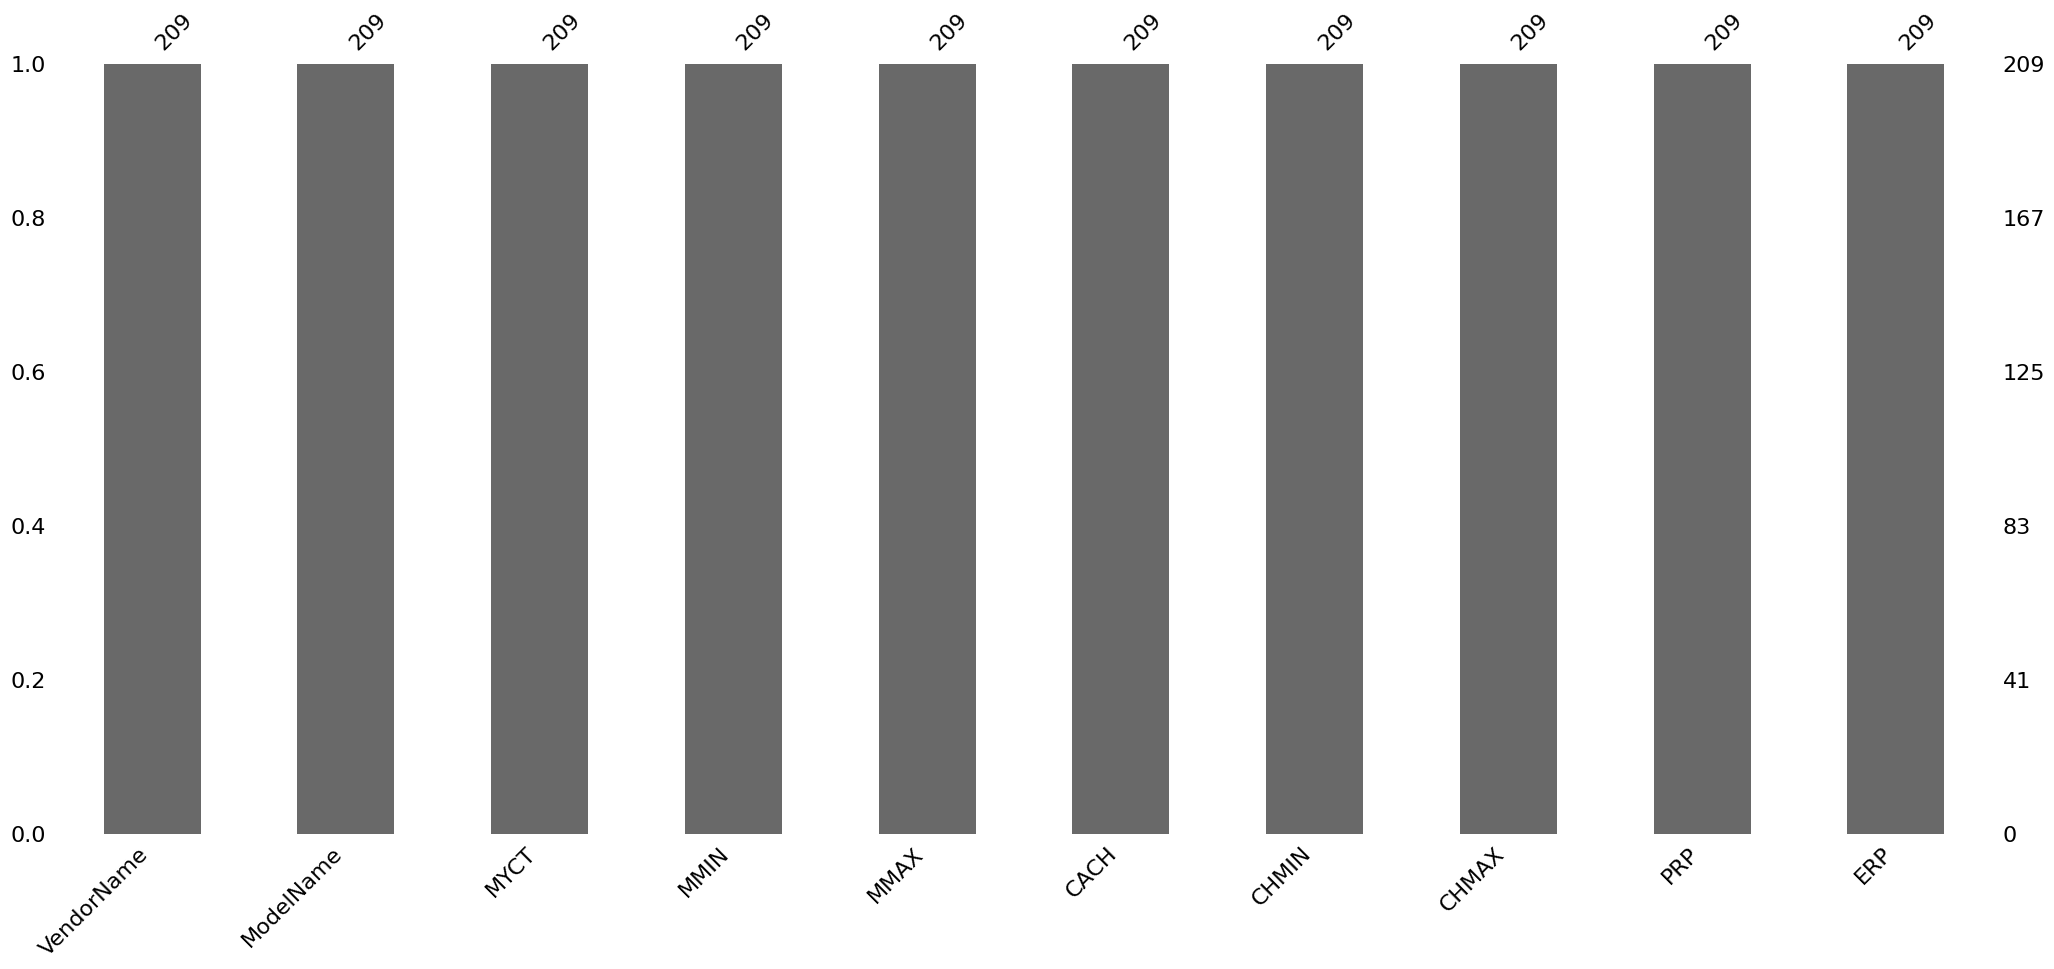

In [2]:
# 데이터 탐색 및 시각화

# 데이터 로드
machine = pd.read_csv("machine.data_update.csv")# CSV 파일을 읽어와 데이터프레임으로 변환
print(machine.head()) # 데이터프레임의 상위 5개 행을 출력

# 결측값 찾기
print(machine.isna().sum())  # 데이터프레임에서 결측값이 있는지 확인
msn.bar(machine)  # 결측값을 막대 그래프로 시각화하여 결측값의 분포를 확인

# 결측치 처리
machine.dropna(inplace=True)  # 결측값이 있는 행을 모두 제거하여 데이터프레임을 정리

In [3]:
#전처리

# 범주형 데이터 수치화
dum_vendor = pd.get_dummies(machine['VendorName'], prefix='vendor', dtype=float)  # 더미 변수 생성
machine = pd.concat([machine.drop('VendorName', axis=1), dum_vendor], axis=1)  # 원래 데이터프레임에서 'VendorName' 열을 제거하고, 더미 변수들과 결합

dum_model = pd.get_dummies(machine['ModelName'], prefix='model', dtype=float)  # 더미 변수 생성
machine = pd.concat([machine.drop('ModelName', axis=1), dum_model], axis=1)  # 원래 데이터프레임에서 'ModelName' 열을 제거하고, 더미 변수들과 결합

print(machine.head())

   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP  vendor_adviser  \
0   125   256   6000   256     16    128  198  199             1.0   
1    29  8000  32000    32      8     32  269  253             0.0   
2    29  8000  32000    32      8     32  220  253             0.0   
3    29  8000  32000    32      8     32  172  253             0.0   
4    29  8000  16000    32      8     16  132  132             0.0   

   vendor_amdahl  ...  model_v8635  model_v8650  model_v8655  model_v8665  \
0            0.0  ...          0.0          0.0          0.0          0.0   
1            1.0  ...          0.0          0.0          0.0          0.0   
2            1.0  ...          0.0          0.0          0.0          0.0   
3            1.0  ...          0.0          0.0          0.0          0.0   
4            1.0  ...          0.0          0.0          0.0          0.0   

   model_v8670  model_vax:11/730  model_vax:11/750  model_vax:11/780  \
0          0.0               0.0            

In [4]:
# 데이터 분리 및 모델 학습

# # 특징과 타겟 변수 정의
X = machine.drop(['PRP'], axis=1)# 'PRP' 컬럼을 제외한 나머지 컬럼을 특징 변수로 정의
y = machine['PRP']# 'PRP' 컬럼을 타겟 변수로 정의

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 선형 회귀 모델 초기화 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [6]:
# 예측 및 평가
y_train_pred = lr_model.predict(X_train)# 선형 회귀 모델 객체 생성
y_test_pred = lr_model.predict(X_test)# 훈련 데이터로 모델 학습

훈련 데이터의 성능:
MSE: 2.0058488249850785e-17, MAE:3.2201219468674935e-09, R^2:1.0
테스트 데이터의 성능:
MSE: 2230.9506003777037, MAE:28.381347318637506, R^2:0.9561758297507437


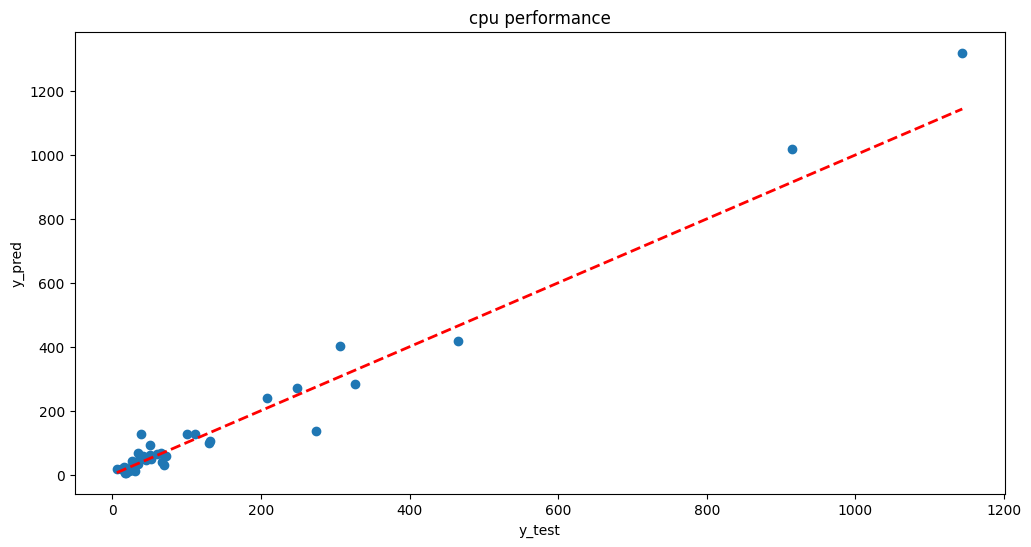

<Figure size 640x480 with 0 Axes>

In [7]:
# 모델 평가
train_mse = mean_squared_error(y_train, y_train_pred)# MSE 계산
train_mae = mean_absolute_error(y_train, y_train_pred)# MAE 계산
train_r2 = r2_score(y_train, y_train_pred)# R^2 계산
print("훈련 데이터의 성능:")
print(f"MSE: {train_mse}, MAE:{train_mae}, R^2:{train_r2}")

test_mse = mean_squared_error(y_test, y_test_pred)# MSE 계산
test_mae = mean_absolute_error(y_test, y_test_pred)# MAE 계산
test_r2 = r2_score(y_test, y_test_pred)# R^2 계산
print("테스트 데이터의 성능:")
print(f"MSE: {test_mse}, MAE:{test_mae}, R^2:{test_r2}")

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_test_pred)# 실제값 vs 예측값 산점도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)# 대각선(완벽한 예측선)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("cpu performance")

# 그래프 저장
plt.show()
plt.savefig('machine.jpg')

In [8]:
# 교차 검증

# 교차 검증을 통해 MSE 계산
cv_score = cross_val_score(lr_model, X, y, cv = 5, scoring='neg_mean_squared_error')
print(cv_score)# 각 폴드의 음수 MSE 점수 출력
cv_mse = -cv_score.mean()# 음수 값을 양수로 변환하여 평균 계산
print(f'Cross-Validated MSE:{cv_mse}')

# 교차 검증을 통해 MAE 계산
cv_score_mae = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_score_mae.mean()# 음수 값을 양수로 변환하여 평균 계산
print(f'Cross-Validated MAE: {cv_mae}')

# 교차 검증을 통해 R^2 점수 계산
cv_score_r2 = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
cv_r2 = cv_score_r2.mean() # R^2 점수의 평균 계산
print(f'Cross-Validated R^2: {cv_r2}')

[-7955.79944308  -972.08438116 -1628.61398289 -2392.14395586
 -5775.92198041]
Cross-Validated MSE:3744.9127486802818
Cross-Validated MAE: 34.195344222097845
Cross-Validated R^2: 0.7872086764176417


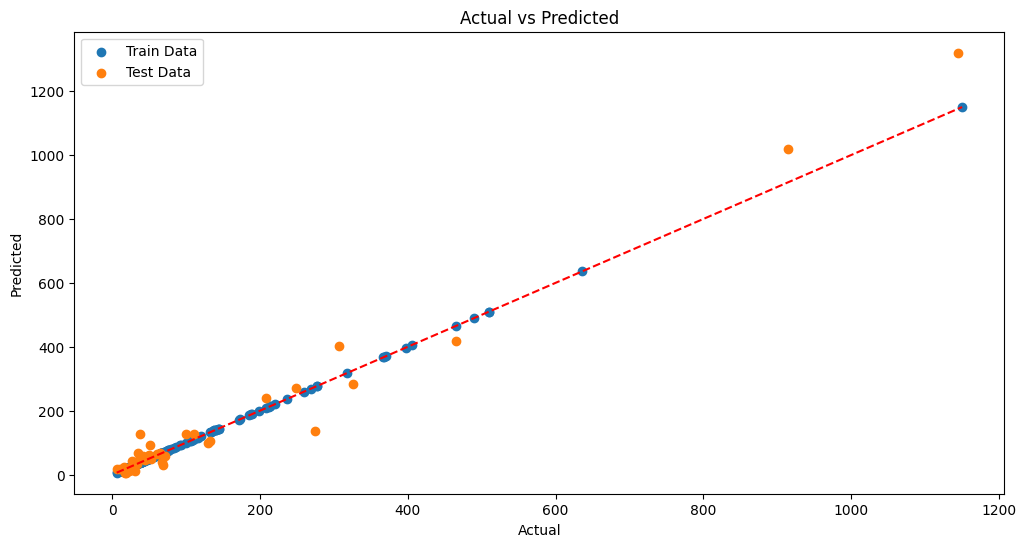

In [9]:
# 분석 결과 시각화
plt.figure(figsize=(12, 6)) # 그래프의 크기를 설정 (가로 12인치, 세로 6인치)
plt.scatter(y_train, y_train_pred, label='Train Data') # 훈련 데이터의 실제값 vs 예측값 산점도
plt.scatter(y_test, y_test_pred, label='Test Data') # 테스트 데이터의 실제값 vs 예측값 산점도
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--') # 대각선 (완벽한 예측선)

# 그래프에 라벨과 제목 추가
plt.xlabel('Actual') # x축 라벨
plt.ylabel('Predicted') # y축 라벨
plt.title('Actual vs Predicted')# 그래프 제목

plt.legend()# 범례 추가
plt.show()# 그래프 표시
